<a href="https://colab.research.google.com/github/Rohit1208/machine_learning/blob/main/Mobile_price_pred(multiple_algo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('/content/train(1).csv')

In [81]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [82]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [83]:
df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [84]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [85]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [86]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [89]:
x_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1847,1685,0,0.6,0,14,0,16,0.6,137,7,15,120,1429,881,6,3,17,0,1,1
270,1066,0,0.6,0,2,1,7,0.9,114,7,18,1242,1571,468,19,13,6,1,1,0
1566,1317,0,1.5,0,6,0,12,0.1,154,2,9,431,542,425,7,0,11,1,1,1
379,1187,1,2.2,0,0,1,46,0.4,145,2,9,1173,1814,3917,13,11,8,1,0,1
316,1648,0,0.7,0,6,1,64,0.8,170,4,9,1153,1876,610,8,1,6,1,1,0


In [12]:
y_test.head()

46      3
0       1
1168    1
778     2
1038    1
Name: price_range, dtype: int64

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [99]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_split=4)
rf = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=8,min_samples_split=4)
svc = SVC(kernel='linear')
gnb  = GaussianNB()

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [100]:
 models = [dtc,rf,svc,gnb]
class build_model:
  def model():
    for i in models:
     print(f'fitting the {i} model')
     i.fit(x_train,y_train)

class prediction(build_model):

   def pred():
      for i in models:
        i = i.predict(x_test)
        exec(f'{i} = y_pred{i}')
        # print(f'y_pred{i}')
        # exec(f'y_pred{i} = {i}.predict(x_test)')
      

class evaluate(prediction):

  def evaluate():
    for i in models:
      # print(f"the accuracy score {i}",accuracy_score(y_test,i))
      # cm = confusion_matrix(y_test,i)
      # print(cm)
       exec(f'accuracy_score(y_test,y_pred{i})')
       exec(f'cm = confusion_matrix(y_test,y_pred{i})')


s1= build_model
s2= prediction
s3= evaluate

s1.model()
# s2.pred()
# s3.evaluate()


# model(x_train,y_train)

fitting the DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') model
fitting the RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [101]:
y_preddtc = dtc.predict(x_test)
y_predrf = rf.predict(x_test)
y_predsvc = svc.predict(x_test)
y_predgnb = gnb.predict(x_test)

In [102]:
pred = {'Decision tree classifier':y_preddtc,'Random forest classifier':y_predrf,'support vector machine':y_predsvc,'gaussian naive bayes':y_predgnb}
for i in pred.keys():
  print(f'the accuracy score {i}',accuracy_score(y_test,pred[i]))
  print(f'confusion matrix {i}')
  exec(f'cm = confusion_matrix(y_test,pred[i])')
  print(cm)
  print(f'the classification report {i}')
  exec(f'cr = classification_report(y_test,pred[i])')
  print(cr)


  


the accuracy score Decision tree classifier 0.852
confusion matrix Decision tree classifier
[[122   7   0   0]
 [ 10  98  16   0]
 [  0  16 102   9]
 [  0   0  16 104]]
the classification report Decision tree classifier
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       129
           1       0.81      0.79      0.80       124
           2       0.76      0.80      0.78       127
           3       0.92      0.87      0.89       120

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500

the accuracy score Random forest classifier 0.868
confusion matrix Random forest classifier
[[125   4   0   0]
 [  8 101  15   0]
 [  0  19  99   9]
 [  0   0  11 109]]
the classification report Random forest classifier
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       129
           1    

the testing accuracy of gnb is 80 and training accuracy is 82
while comparing other it looks like not over fitting

In [107]:
gnb.score(x_train,y_train)

0.82

gaussian naive vayes is chosen as best algorithm

In [108]:
gnb1 = GaussianNB()

In [116]:
gnb1.fit(x,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [112]:
test_data = pd.read_csv('/content/test(1).csv')

In [118]:
test_data.pop('id')

0         1
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Name: id, Length: 1000, dtype: int64

In [113]:
test_data.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [120]:
test_pred = gnb1.predict(test_data)
test_data['pred_price_range'] = test_pred

In [121]:
test_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,pred_price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0,2


In [123]:
x = test_data['pred_price_range'].value_counts()
print(x)

3    253
1    252
2    248
0    247
Name: pred_price_range, dtype: int64


count of pred_price


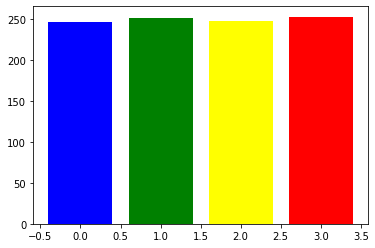

distribution of pred in pie chart


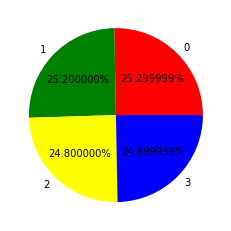

In [130]:
print('count of pred_price')
plt.bar(x=x.index,height=x.values,color=['red','green','yellow','blue'])
plt.show()
print('distribution of pred in pie chart')
plt.pie(x,labels=['0','1','2','3'],colors=['red','green','yellow','blue'],autopct='%2f%%')
plt.show()

In [ ]:
#####################################end##############################################